<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/LDA23/LDA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#markdown Make data directory if it doesn't exist
%%capture
!mkdir -p data
!wget -nc https://raw.githubusercontent.com/MK316/Workingpapers/main/LDA23/data/ksat_LD_result.csv

In [3]:
import pandas as pd

In [10]:
# Read csv (df) > Select columns (df1) > Clean up non-word characters
df = pd.read_csv("ksat_LD_result.csv")
df1 = df[["Year", "QN", "Passage", "N_Splits"]]
# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df1.content = df.Passage.str.replace("[^A-Za-z ]", " ")

df1.tail()

<ipython-input-10-a1b60bc488dc>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.content = df.Passage.str.replace("[^A-Za-z ]", " ")
<ipython-input-10-a1b60bc488dc>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.content = df.Passage.str.replace("[^A-Za-z ]", " ")


,Year,QN,Passage,N_Splits
123,2019,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",105
124,2018,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin...",113
125,2017,Q18,Want to improve your Korean writing? Writing i...,119
126,2016,Q18,"Dear Coach Johnson,\nMy name is Christina Mark...",128
127,2015,Q18,One difference between winners and losers is h...,107


In [12]:
df1.content[127]

'One difference between winners and losers is how they handle losing  Even for the best companies and most accomplished professionals  long track records of success are punctuated by slips  slides  and mini turnarounds  Even the team that wins the game might make mistakes and lag behind for part of it  That is why the ability to recover quickly is so important  Troubles are ubiquitous  Surprises can fall from the sky like volcanic ash and appear to change everything  That is why one prominent scholar said  Anything can look like a failure in the middle  Thus  a key factor in high achievement is bouncing back from the low points '

# Stop word process

# Continue 

In [13]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [14]:
from gensim.utils import simple_preprocess

texts = df1.content.apply(simple_preprocess)

In [15]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
#bow = bag of words
corpus = [dictionary.doc2bow(text) for text in texts]

In [16]:
corpus

[[(0, 2),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 4),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 4),
  (26, 1),
  (27, 1)],
 [(1, 1),
  (2, 1),
  (3, 2),
  (5, 3),
  (11, 3),
  (13, 1),
  (21, 1),
  (25, 1),
  (26, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 2),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 3),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 6),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(3, 1),
  (5, 1),
  (6, 1),
  (21, 1),
  (31, 1),
  (44, 1),
  (45, 1),
  (48, 2),
  (50, 2),
  (55, 1),
  (57, 1),
  (61, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (

In [17]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [18]:
# LSI or LDA
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [ ]:
lsi_model.print_topics()

In [20]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,-0.013865,medium,0
1,-0.015616,renewable,0
2,-0.016131,creating,0
3,-0.016757,sea,0
4,-0.016823,supply,0


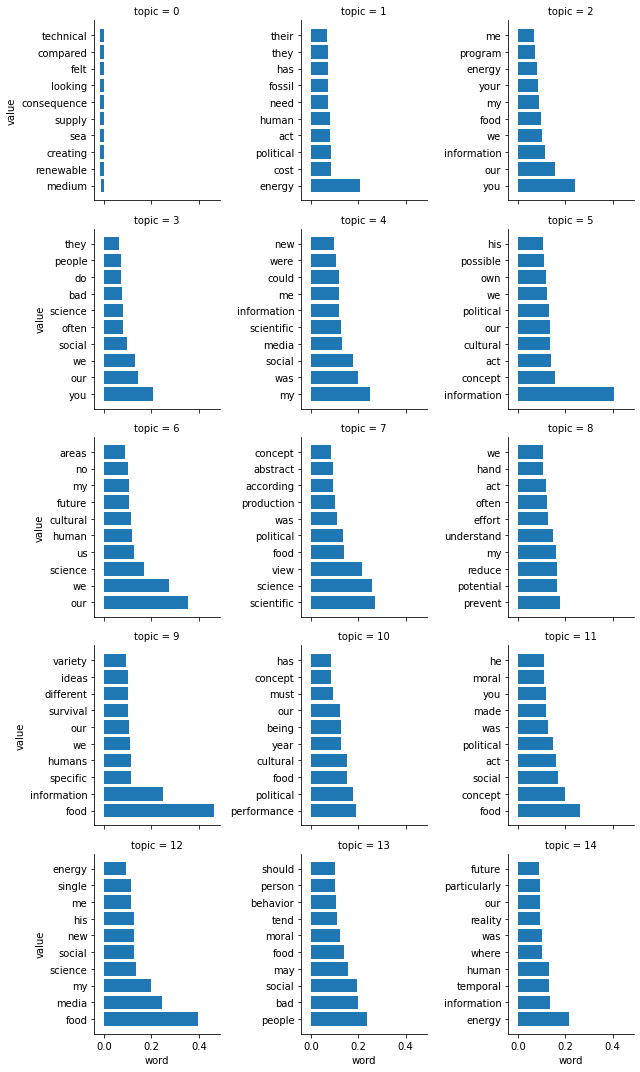

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

# LDA analysis

In [23]:
from gensim.utils import simple_preprocess

texts = df1.Passage.apply(simple_preprocess)

In [24]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [29]:
from gensim import models

n_topics = 5

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [30]:
lda_model.print_topics()

[(0,
  '0.037*"326" + 0.031*"115" + 0.018*"189" + 0.017*"191" + 0.013*"379" + 0.013*"68" + 0.012*"40" + 0.011*"198" + 0.011*"9" + 0.010*"32"'),
 (1,
  '0.021*"32" + 0.018*"3" + 0.013*"68" + 0.012*"11" + 0.012*"100" + 0.012*"189" + 0.011*"5" + 0.011*"127" + 0.011*"214" + 0.011*"109"'),
 (2,
  '0.023*"100" + 0.020*"326" + 0.015*"300" + 0.015*"5" + 0.013*"301" + 0.013*"3" + 0.012*"68" + 0.012*"11" + 0.011*"109" + 0.010*"32"'),
 (3,
  '0.023*"58" + 0.020*"6" + 0.020*"100" + 0.019*"189" + 0.018*"32" + 0.013*"120" + 0.013*"121" + 0.013*"104" + 0.012*"9" + 0.012*"3"'),
 (4,
  '0.018*"321" + 0.016*"189" + 0.015*"5" + 0.015*"214" + 0.014*"3" + 0.013*"68" + 0.013*"13" + 0.012*"32" + 0.012*"153" + 0.011*"41"')]

In [27]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.1 MB/s eta 0:00:00


In [31]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.033560 -0.001576       1        1  30.950936
2      0.000830  0.023904       2        1  29.280998
1     -0.022517  0.016703       3        1  22.450638
4     -0.003274 -0.041873       4        1  11.442072
0      0.058521  0.002841       5        1   5.875356, topic_info=            Term       Freq       Total Category  logprob  loglift
326          you  81.000000   81.000000  Default  30.0000  30.0000
115  information  36.000000   36.000000  Default  29.0000  29.0000
321           my  26.000000   26.000000  Default  28.0000  28.0000
189           we  94.000000   94.000000  Default  27.0000  27.0000
191         will  60.000000   60.000000  Default  26.0000  26.0000
..           ...        ...         ...      ...      ...      ...
5           from   3.234049   84.297821   Topic5  -4.8330  -0.4262
160         only   2.538829   38.049627   Topic5  -5.0751   0.1272
300           he   2.467319   41.205973   Topic5  -5.1036   0.0190
100         they   2.570740  115.055861   Topic5  -5.0626  -0.9668
109          can   2.351034   68.444501   Topic5  -5.1519  -0.5368

[337 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
28        1  0.177394  about
28        2  0.430814  about
28        3  0.202736  about
28        4  0.126710  about
28        5  0.076026  about
...     ...       ...    ...
379       1  0.200580   your
379       2  0.343851   your
379       3  0.200580   your
379       4  0.085963   your
379       5  0.143271   your

[893 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])